In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

In [2]:
# Load the dataset (assuming it's a JSON file)
file_path = '../dataset/review_all.json'
data = pd.read_json(file_path, lines=True)

# Print basic information
print(f"Dataset size: {len(data)}")
print("Sample record:")
print(data.iloc[0])

# Keep relevant columns
data = data[['user_id', 'business_id', 'stars', 'date']]

# Display basic info about the dataset
print(data.info())
print(data.head())

Dataset size: 229907
Sample record:
votes                       {'funny': 0, 'useful': 5, 'cool': 2}
user_id                                   rLtl8ZkDX5vH5nAx9C3q5Q
review_id                                 fWKvX83p0-ka4JS3dc6E5A
stars                                                          5
date                                         2011-01-26 00:00:00
text           My wife took me here on my birthday for breakf...
type                                                      review
business_id                               9yKzy9PApeiPPOUJEtnvkg
Name: 0, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229907 entries, 0 to 229906
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      229907 non-null  object        
 1   business_id  229907 non-null  object        
 2   stars        229907 non-null  int64         
 3   date         229907 non-null  datetime64[ns]
dtypes: dat

In [3]:
# Number of unique users and businesses
n_users = data['user_id'].nunique()
n_businesses = data['business_id'].nunique()
n_ratings = len(data)

print(f"Number of users: {n_users}")
print(f"Number of businesses: {n_businesses}")
print(f"Number of ratings: {n_ratings}")

# Calculate sparsity
sparsity = 1 - (n_ratings / (n_users * n_businesses))
print(f"Sparsity of the user-business matrix: {sparsity:.2%}")

Number of users: 45981
Number of businesses: 11537
Number of ratings: 229907
Sparsity of the user-business matrix: 99.96%


/var/folders/78/0qt3sk0s3_s2xykbgfcmtky40000gn/T/ipykernel_60995/3038413356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=data, palette='viridis')


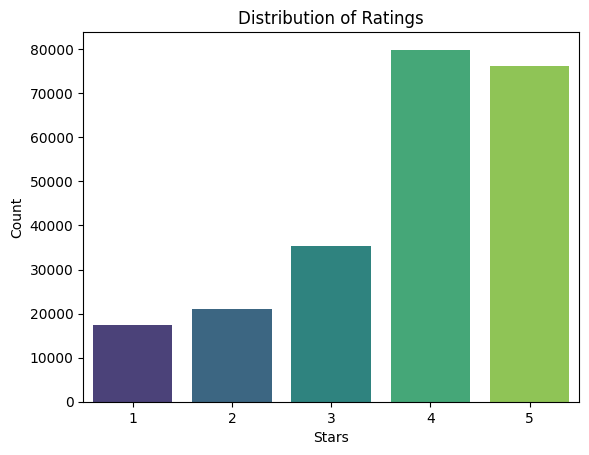

In [4]:
# Plot the distribution of ratings
sns.countplot(x='stars', data=data, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

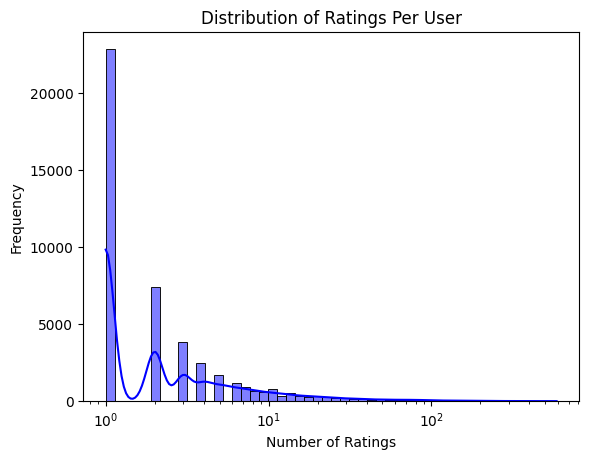

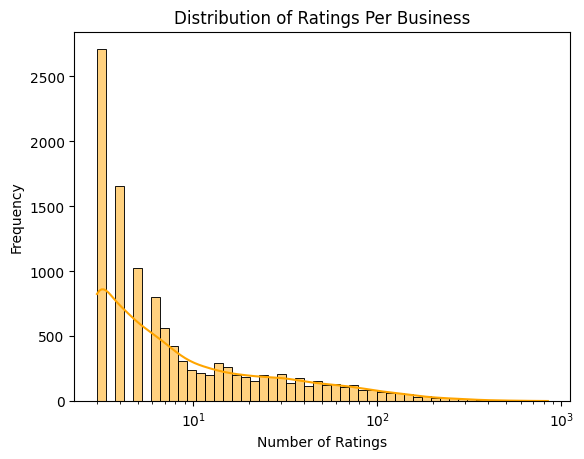

Average ratings per user: 5.00
Median ratings per user: 2.00
Average ratings per business: 19.93
Median ratings per business: 6.00


In [5]:
# Number of ratings per user
ratings_per_user = data.groupby('user_id')['stars'].count()
ratings_per_business = data.groupby('business_id')['stars'].count()

# Plot distribution of ratings per user
sns.histplot(ratings_per_user, bins=50, kde=True, log_scale=True, color='blue')
plt.title('Distribution of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of ratings per business
sns.histplot(ratings_per_business, bins=50, kde=True, log_scale=True, color='orange')
plt.title('Distribution of Ratings Per Business')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Summary stats
print(f"Average ratings per user: {ratings_per_user.mean():.2f}")
print(f"Median ratings per user: {ratings_per_user.median():.2f}")
print(f"Average ratings per business: {ratings_per_business.mean():.2f}")
print(f"Median ratings per business: {ratings_per_business.median():.2f}")

In [14]:
# Users with fewer than 5 ratings
cold_start_users = (ratings_per_user <= 3).sum()
cold_start_businesses = (ratings_per_business <= 5).sum()

print(f"Number of cold-start users (<=3 ratings): {cold_start_users} ({cold_start_users / n_users:.2%})")
print(f"Number of cold-start businesses (<=5 ratings): {cold_start_businesses} ({cold_start_businesses / n_businesses:.2%})")

Number of cold-start users (<=3 ratings): 34074 (74.10%)
Number of cold-start businesses (<=5 ratings): 5389 (46.71%)


In [7]:
# # Create a sparse matrix (user-business matrix)
# user_business_matrix = data.pivot_table(index='user_id', columns='business_id', values='stars')

# # Sample a subset for visualization
# sample_matrix = user_business_matrix.iloc[:100, :100]  # Adjust size if needed
# plt.figure(figsize=(12, 8))
# sns.heatmap(sample_matrix, cmap='viridis', cbar=False)
# plt.title('Heatmap of User-Business Interactions (Sample)')
# plt.xlabel('Businesses')
# plt.ylabel('Users')
# plt.show()

In [8]:
# # Compute item-item similarity based on co-ratings
# business_user_matrix = data.pivot_table(index='business_id', columns='user_id', values='stars', fill_value=0)

# # Calculate correlation matrix (only meaningful if matrix is not too sparse)
# correlation_matrix = business_user_matrix.T.corr()

# # Plot a heatmap of correlations (sample)
# sample_corr = correlation_matrix.iloc[:50, :50]  # Adjust size if needed
# plt.figure(figsize=(12, 8))
# sns.heatmap(sample_corr, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix of Businesses (Sample)')
# plt.show()

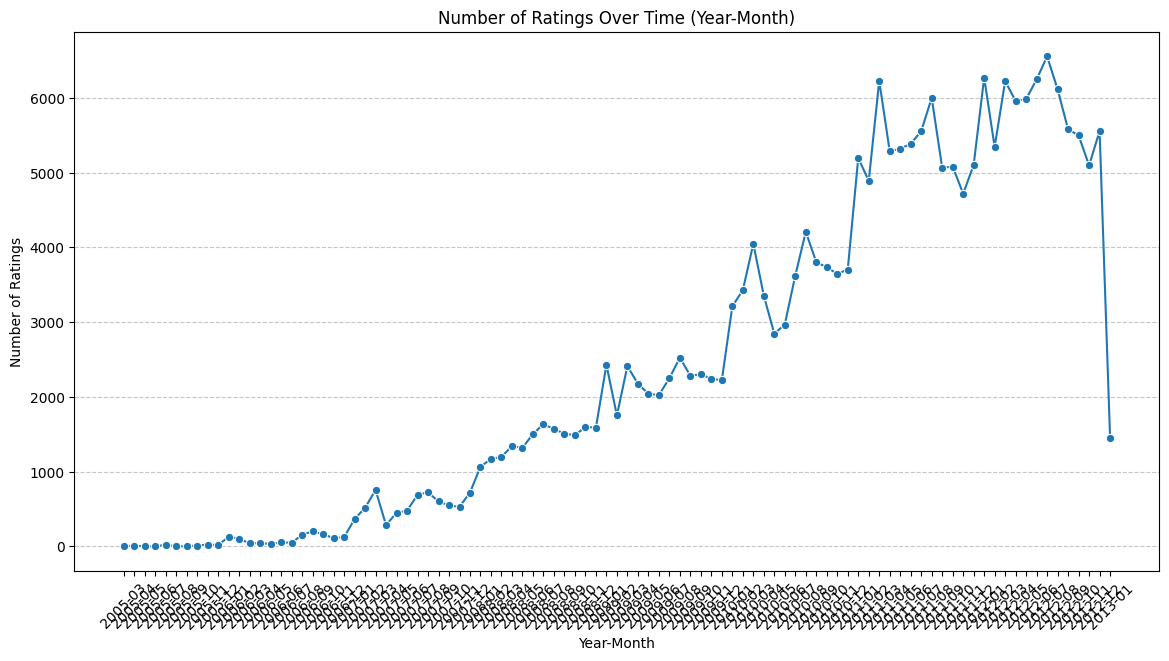

In [9]:
# Convert date to datetime if not already done
data['date'] = pd.to_datetime(data['date'])

# Extract year and month in "YYYY-MM" format
data['year_month'] = data['date'].dt.to_period('M').astype(str)

# Group by year-month and count the number of ratings
ratings_per_month = data.groupby('year_month')['stars'].count()

# Plot ratings over time by year-month
plt.figure(figsize=(14, 7))
sns.lineplot(x=ratings_per_month.index, y=ratings_per_month.values, marker='o')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Number of Ratings Over Time (Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()